# Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis
# Problem Statement

In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

# Objective

This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

# Research Question

Is there a relationship between total fare amount and payment type, and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv("yellow_tripdata_2020-01.csv")

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,01-01-20 00:28,01-01-20 00:33,1,1.2,1,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,01-01-20 00:35,01-01-20 00:43,1,1.2,1,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1,01-01-20 00:47,01-01-20 00:53,1,0.6,1,N,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1,01-01-20 00:55,01-01-20 01:00,1,0.8,1,N,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2,01-01-20 00:01,01-01-20 00:04,1,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


# Exploratory Data Analysis

In [4]:
df.shape

(1048575, 18)

In [5]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [6]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [7]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [8]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'] 
df['duration'] = df['duration'].dt.total_seconds()/60

In [9]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1,2020-01-01 00:28:00,2020-01-01 00:33:00,1,1.2,1,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,5.0
1,1,2020-01-01 00:35:00,2020-01-01 00:43:00,1,1.2,1,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,8.0
2,1,2020-01-01 00:47:00,2020-01-01 00:53:00,1,0.6,1,N,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.0
3,1,2020-01-01 00:55:00,2020-01-01 01:00:00,1,0.8,1,N,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,5.0
4,2,2020-01-01 00:01:00,2020-01-01 00:04:00,1,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,3.0


In [10]:
df = df[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration']]

In [11]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.2,5.0
1,1,1,7.0,1.2,8.0
2,1,1,6.0,0.6,6.0
3,1,1,5.5,0.8,5.0
4,1,2,3.5,0.0,3.0
...,...,...,...,...,...
1048570,1,2,5.5,0.7,5.0
1048571,1,1,8.5,1.3,10.0
1048572,1,1,7.5,1.4,9.0
1048573,3,1,5.5,0.7,4.0


In [12]:
df.isnull().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
duration           0
dtype: int64

In [13]:
(65441/len(df))*100

6.240946045824095

In [14]:
df.dropna(inplace= True)

In [15]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.2,5.0
1,1,1,7.0,1.2,8.0
2,1,1,6.0,0.6,6.0
3,1,1,5.5,0.8,5.0
4,1,2,3.5,0.0,3.0
...,...,...,...,...,...
1048570,1,2,5.5,0.7,5.0
1048571,1,1,8.5,1.3,10.0
1048572,1,1,7.5,1.4,9.0
1048573,3,1,5.5,0.7,4.0


In [16]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64') 

In [17]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
250,1,1,10.5,2.0,13.0
271,2,1,6.5,1.4,6.0
327,1,2,3.5,0.5,1.0
341,1,1,10.0,1.5,14.0
367,1,1,4.5,0.6,4.0
...,...,...,...,...,...
1048570,1,2,5.5,0.7,5.0
1048571,1,1,8.5,1.3,10.0
1048572,1,1,7.5,1.4,9.0
1048573,3,1,5.5,0.7,4.0


In [18]:
df.drop_duplicates(inplace = True)

In [19]:
df.shape

(284883, 5)

In [20]:
df['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.502210
2    0.206085
3    0.086713
5    0.073929
4    0.058561
6    0.050372
0    0.022062
7    0.000035
8    0.000021
9    0.000014
Name: proportion, dtype: float64

In [21]:
df['payment_type'].value_counts(normalize = True)

payment_type
1    0.600461
2    0.377264
3    0.013135
4    0.009141
Name: proportion, dtype: float64

In [22]:
df = df[df['payment_type'] < 3]

df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]

In [23]:
df.shape

(258277, 5)

In [24]:
df['payment_type'].replace([1,2], ['Card','Cash'], inplace=True)

In [25]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,258277.000000,258277.000000,258277.000000,258277.000000
mean,1.926029,23.640822,6.648569,1452.520577
std,1.269409,18.653722,6.068436,7689.410656
min,1.000000,-500.000000,-22.180000,-86290.000000
25%,1.000000,11.500000,2.220000,13.000000
50%,1.000000,18.000000,4.510000,19.000000
75%,2.000000,31.000000,9.300000,28.000000
max,5.000000,1238.000000,259.220000,132328.000000


In [26]:
df = df[ df['fare_amount']>0 ]
df = df[ df['trip_distance']>0 ]
df = df[ df['duration']>0 ]

In [27]:
for col in ['fare_amount','trip_distance','duration']:
    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1

    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR

    df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]


In [28]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,5.0
1,1,Card,7.0,1.20,8.0
2,1,Card,6.0,0.60,6.0
3,1,Card,5.5,0.80,5.0
5,1,Cash,2.5,0.03,1.0
...,...,...,...,...,...
1048451,1,Cash,12.0,3.49,13.0
1048495,3,Card,52.0,17.97,31.0
1048522,1,Card,25.0,4.92,36.0
1048533,1,Card,12.0,3.43,8.0


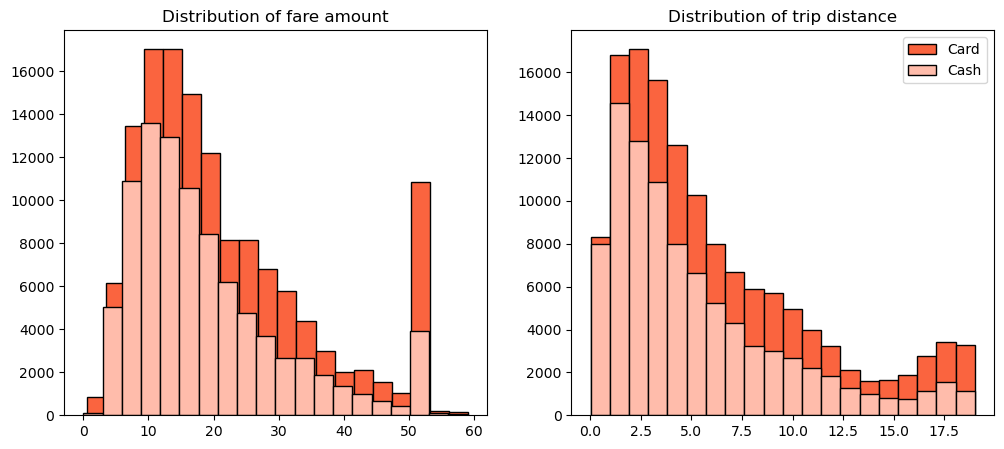

In [29]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Distribution of fare amount')

plt.hist(df[df['payment_type']=='Card']['fare_amount'], histtype='barstacked', bins=20, edgecolor='k', color='#FA643F', label='Card')

plt.hist(df[df['payment_type']=='Cash']['fare_amount'], histtype='barstacked', bins=20, edgecolor='k', color='#FFBCAB', label='Cash')


plt.subplot(1,2,2)
plt.title('Distribution of trip distance')

plt.hist(df[df['payment_type']=='Card']['trip_distance'], histtype='barstacked', bins=20, edgecolor='k', color='#FA643F', label='Card')

plt.hist(df[df['payment_type']=='Cash']['trip_distance'], histtype='barstacked', bins=20, edgecolor='k', color='#FFBCAB', label='Cash')

plt.legend()
plt.show()


In [30]:
df.groupby('payment_type').agg({'fare_amount': ['mean', 'std'] , 'trip_distance': ['mean','std']})


fare_amount            trip_distance          
                    mean        std          mean       std
payment_type                                               
Card           21.684637  13.324545      6.085629  4.799939
Cash           18.775726  11.818907      5.176264  4.357135

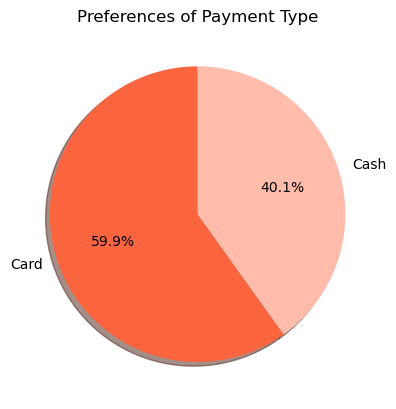

In [31]:
plt.title('Preferences of Payment Type')

plt.pie(
    df['payment_type'].value_counts(normalize=True),
    labels = df['payment_type'].value_counts().index,
    startangle = 90,
    shadow = True,
    autopct = '%1.1f%%',
    colors = ['#FA643F', '#FFBCAB']
)

plt.show()


In [32]:
passenger_count = df.groupby(['payment_type', 'passenger_count']) [['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count': 'count'}, inplace = True)
passenger_count.reset_index(inplace = True)

In [33]:
passenger_count['perc'] = (passenger_count['count']/ passenger_count['count'].sum())*100

In [34]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,70783,31.182350
1,Card,2,31016,13.663617
2,Card,3,13389,5.898316
3,Card,4,8493,3.741459
4,Card,5,12279,5.409323
5,Cash,1,48139,21.206888
6,Cash,2,20007,8.813773
7,Cash,3,8985,3.958202
8,Cash,4,6556,2.888144
9,Cash,5,7350,3.237928


In [35]:
d = pd.DataFrame(columns = ['payment_type', 1, 2, 3, 4, 5])

d['payment_type'] = ['Card', 'Cash']

d.iloc[0,1:] = passenger_count.iloc[0:5,-1]
d.iloc[1,1:] = passenger_count.iloc[5:,-1]


In [36]:
d

,payment_type,1,2,3,4,5
0,Card,31.18235,13.663617,5.898316,3.741459,5.409323
1,Cash,21.206888,8.813773,3.958202,2.888144,3.237928


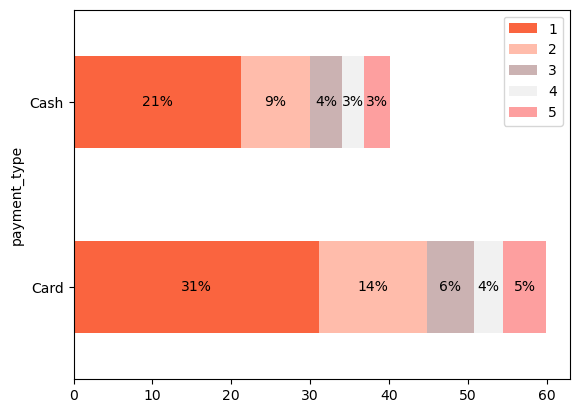

In [37]:
ax = d.plot(
    x='payment_type',
    kind='barh',
    stacked=True,
    color=['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F']
)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    ax.text(
        x + width / 2,
        y + height / 2,
        '{:.0f}%'.format(width),
        ha='center',
        va='center'
    )


**Null Hypothesis (H₀)** - There is no difference in average fare between credit card users and cash users.

**Alternative Hypothesis (H₁)** - There is a difference in average fare between credit card users and cash users.

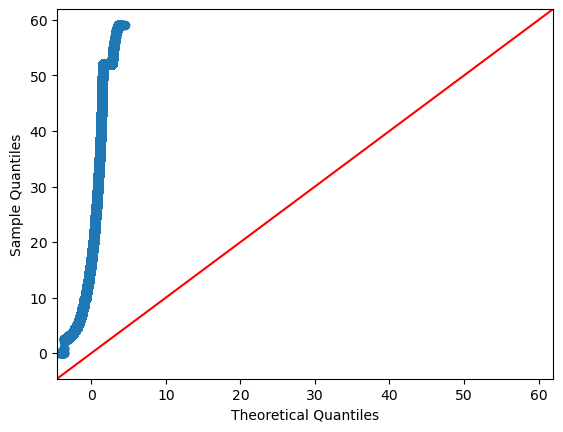

In [42]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(df['fare_amount'], line = '45')
plt.show()


In [43]:
# 1. Splitting the data into two samples based on payment type
card_sample = df[df['payment_type'] == 'Card']['fare_amount']
cash_sample = df[df['payment_type'] == 'Cash']['fare_amount']

# 2. Performing the Welch's t-test (Independent samples)
# equal_var = False is used because we don't assume the variances are equal
t_stats, p_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var = False)

# 3. Displaying the results
print('T statistic', t_stats, 'p-value', p_value)

T statistic 54.582382616355176 p-value 0.0


As the p value is less than 0.05 we reject the Null Hypothesis